# Employee Performance Analysis 

## INX Future Inc. 

In [3]:
#Import the important libraries and tools for processing data.

#1. Data Analysis and Visualization Libraries:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations
import seaborn as sns # For statistical data visualization
import matplotlib.pyplot as plt # For creating plots

#2. Data Preprocessing Libraries:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score # For model validation 
from sklearn.preprocessing import LabelEncoder # For encoding the categorical variables

# 3. Machine Learning Models:
from sklearn.ensemble import RandomForestClassifier # Random Forest Model
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting Model
from sklearn.tree import DecisionTreeClassifier # Decision Tree Model
from sklearn.neighbors import KNeighborsClassifier # KNN Model
import lightgbm as lgb #LightGBM Model

#4. Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # For evaluating our models
from sklearn.metrics import  accuracy_score # For Model's Accuracy Calculation


#5. Handling warnings
import warnings
warnings.filterwarnings("ignore") #To suppress any warning


The first step of Analysis invoved importing of all the necessary libraries that will be applicable to our data manipulation journey. This include the data visualization and analysis tools which are Numpy, Pandas, Seaborn, and Matplotlib. Preprocessing libraries include train_test_split, GridSearchCV, cross_val_score and the label encoder. Machine learning libraries including the classification models for our employee performance classification task, Random Forest, Gradient boosting, Decision tree, K-Nearest Neighbors and LightGBM models.

The Evaluation metrics used for our classification problem include the Accuracy score, classification_report and the confusion_matrix

We also imported the warnings library to mute out any warnings from our otputs.

# Exploratory Data Analysis (EDA)

## Data Loading

In [5]:
#Loading the dataset

df = pd.read_excel('Employees Data.xlsx')


#Display the first 5 values of the dataset to have an overview on the overal data

df.head() 

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


The dataset is fully loaded in excel format for processing. The above code displays the first 5 rows of the dataset and a total of all the 28 features giving us a sneakpeak of the dataset.

## i) Data Cleaning and Assessment

In [6]:
# Inspect the dataset and explore its characteristics before we proceed to processing

print("Dataset Overview \n")
print(f"{df.info()} \n")
df.head(5) #And display the first 5 rows of the dataset

Dataset Overview 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13 

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


The code displays 9 categorical columns of our dataset and 19 numerical colums totalling to 28 columns, all non null entries.

## ii) Distribution of Any Null Values

In [7]:
#Investigating data for any missing values
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

The data is clean with no missing values.

## iii) Checking for Any Duplicated Values

In [8]:
# Checking data for Duplicated values with the Employee number as a unique identifier
duplicates = df.duplicated(subset=['EmpNumber'])
print(f"Total Duplicated EmpNumber Entries: {duplicates.sum()}")

# Display Duplicated Rows (if there are any)
if duplicates.sum() > 0:
    print("\nDuplicate Rows based on Employee number EmpNumber:")
    print(df[duplicates])
else:
    print("\nNo Duplicate EmpNumber Entries Found")

Total Duplicated EmpNumber Entries: 0

No Duplicate EmpNumber Entries Found


Using the Employee ID as the unique identifier, there are no duplicated entries for the employee data.

## iv) InterQuatile Method to Detect Outliers

Age (IQR)= 0 outliers
DistanceFromHome (IQR)= 0 outliers
EmpEducationLevel (IQR)= 0 outliers
EmpEnvironmentSatisfaction (IQR)= 0 outliers
EmpHourlyRate (IQR)= 0 outliers
EmpJobInvolvement (IQR)= 0 outliers
EmpJobLevel (IQR)= 0 outliers
EmpJobSatisfaction (IQR)= 0 outliers
NumCompaniesWorked (IQR)= 39 outliers
EmpLastSalaryHikePercent (IQR)= 0 outliers
EmpRelationshipSatisfaction (IQR)= 0 outliers
TotalWorkExperienceInYears (IQR)= 51 outliers
TrainingTimesLastYear (IQR)= 188 outliers
EmpWorkLifeBalance (IQR)= 0 outliers
ExperienceYearsAtThisCompany (IQR)= 56 outliers
ExperienceYearsInCurrentRole (IQR)= 16 outliers
YearsSinceLastPromotion (IQR)= 88 outliers
YearsWithCurrManager (IQR)= 11 outliers
PerformanceRating (IQR)= 326 outliers


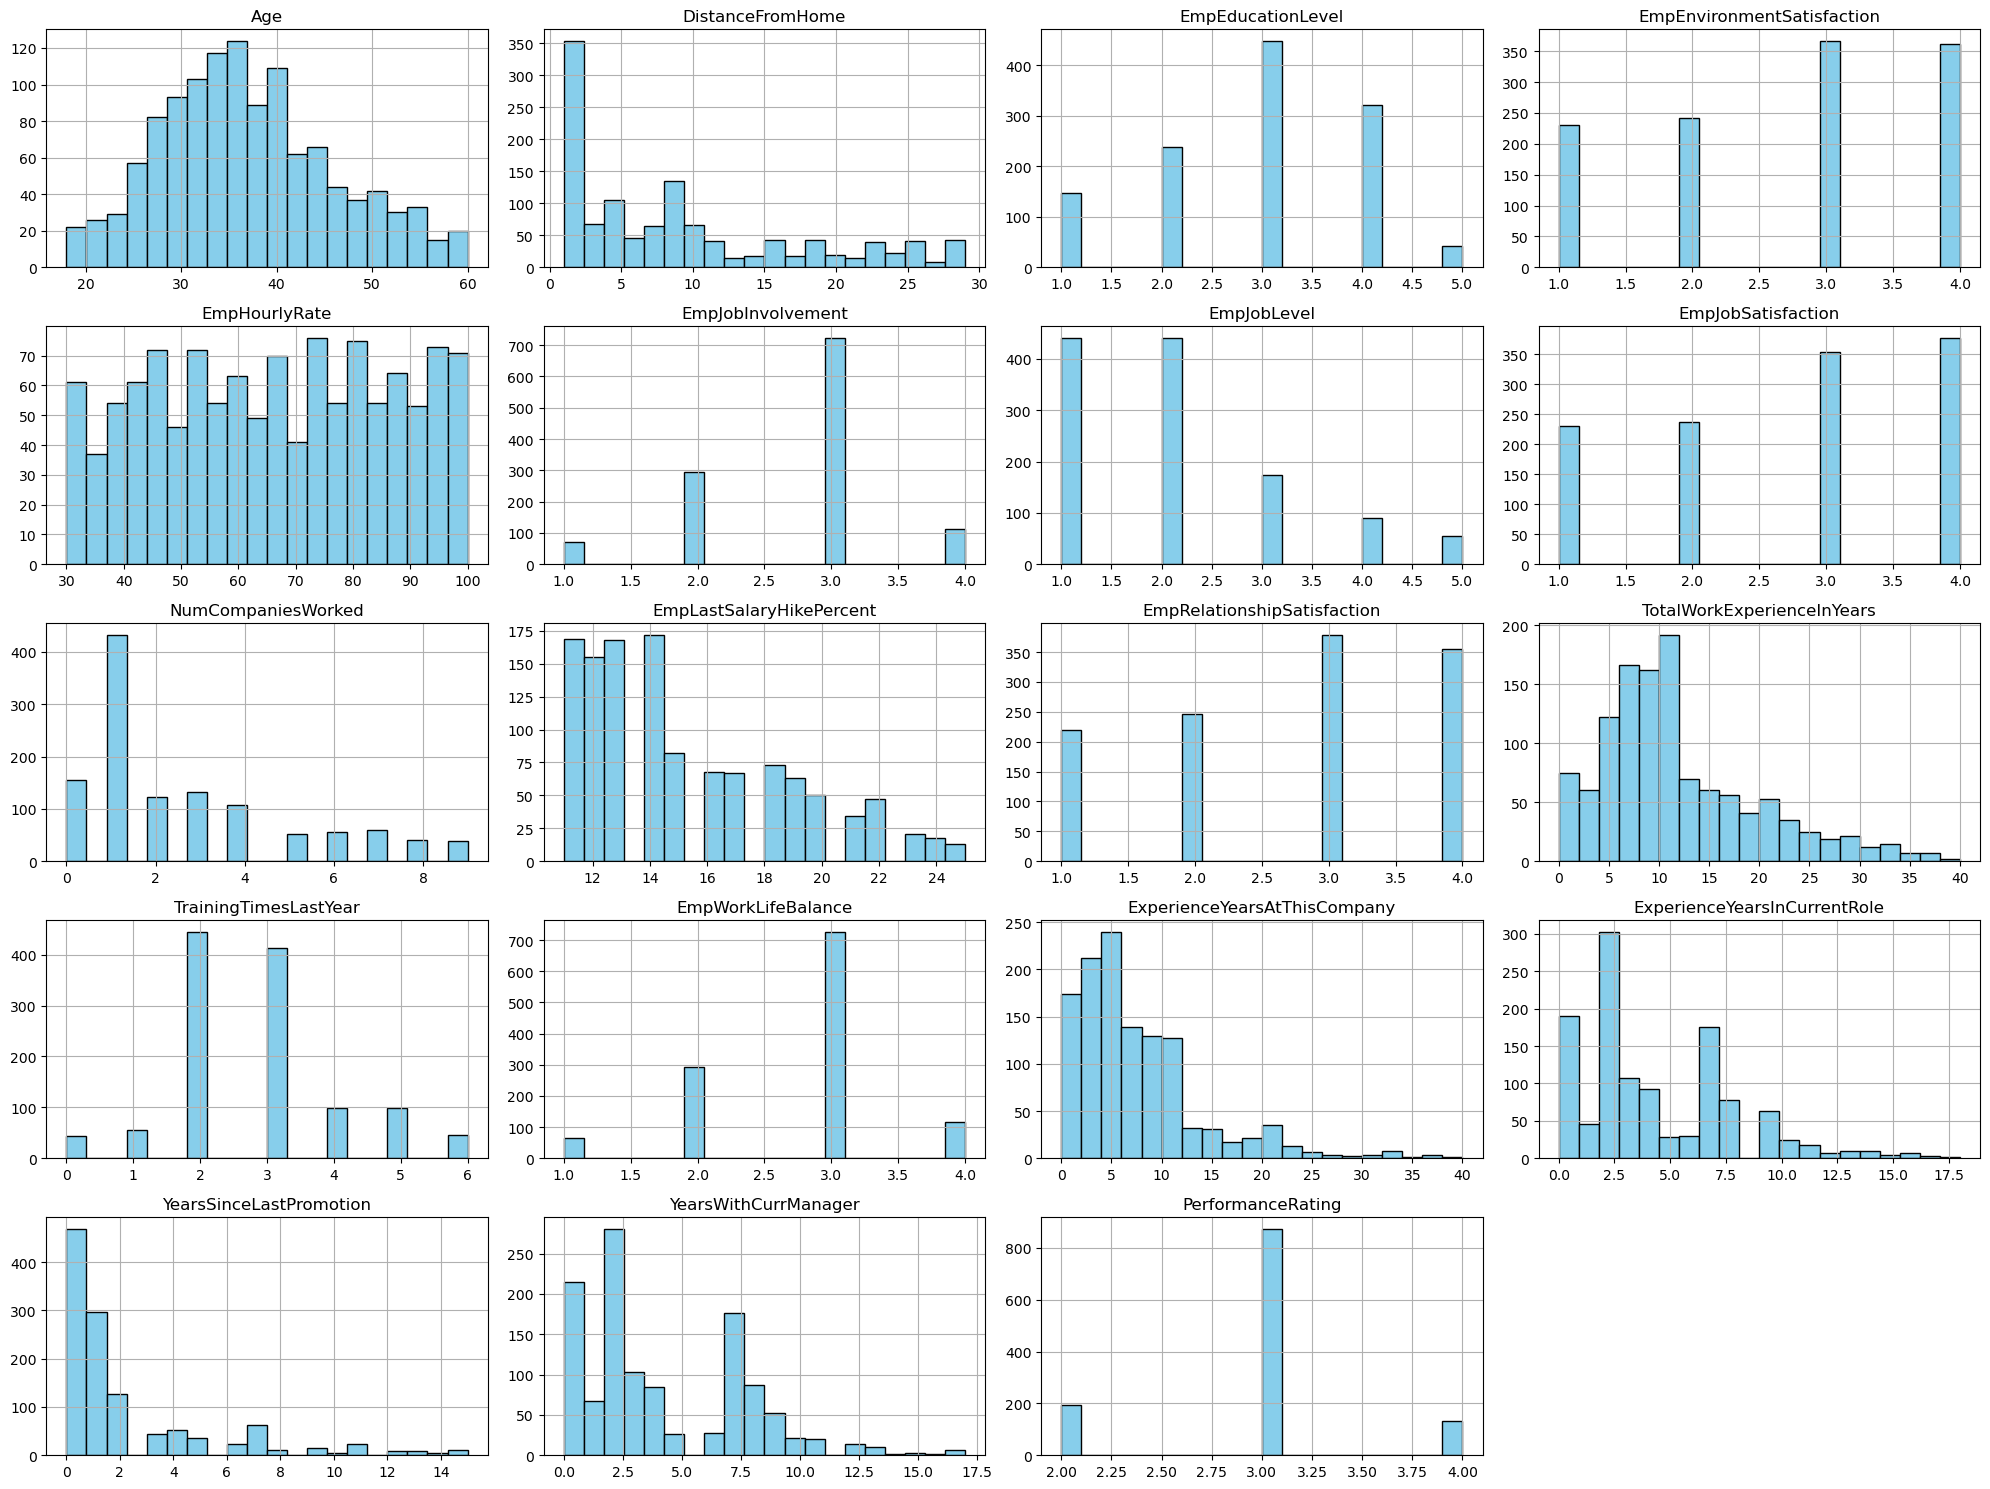

In [9]:
# IQR Method to Identify Outliers
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_indices = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
        outliers[column] = outlier_indices
    return outliers

iqr_outliers = detect_outliers_iqr(df)

# Print IQR Outlier Summary
for column, indices in iqr_outliers.items():
    print(f"{column} (IQR)= {len(indices)} outliers")

# Visualization of Outliers Using Histogram
def plot_histograms(df):
    df.hist(figsize=(20, 15), bins=20, color='skyblue', edgecolor='black')
    plt.tight_layout()
    plt.show()

plot_histograms(df)

We shall define a function, detect_outliers_iqr, that returns outliers for each of the numerical features when we pass in the dataframe. Age has no outliers with a fairly normal distribution with most employees around 30 to 43 years old. Performance rating has the most outliers, which is also our target variable. Most of the staff have a rating of 3.00 with a few highs (4.00) and lows (3.00). This is followed by TrainingTimesLastYear which has 188 outliers.

In [10]:
#Obtaining the summary statistics for the dataset

df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


This code give the summary Statistics of our numerical features in the dataset e.g The mean age is 36.9 with an upper quartile Q3 at 43, Lower quartile Q1 at 30. The middle most age is 36 with a standard deviation of 9.08. There are a total of 1,200 age entries. The summary statistics gives unique values across all the other numeric features as well.

In [11]:
#Selecting categorical variables
df.select_dtypes(include=['object', 'category']).columns

Index(['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime',
       'Attrition'],
      dtype='object')

The code helps display all the categorical features in ithe dataset, a total of 9.

In [12]:
#Selecting numerical variables
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

The code helps display all the 19 numerical features features in the dataset

## v) Univariate Visualization

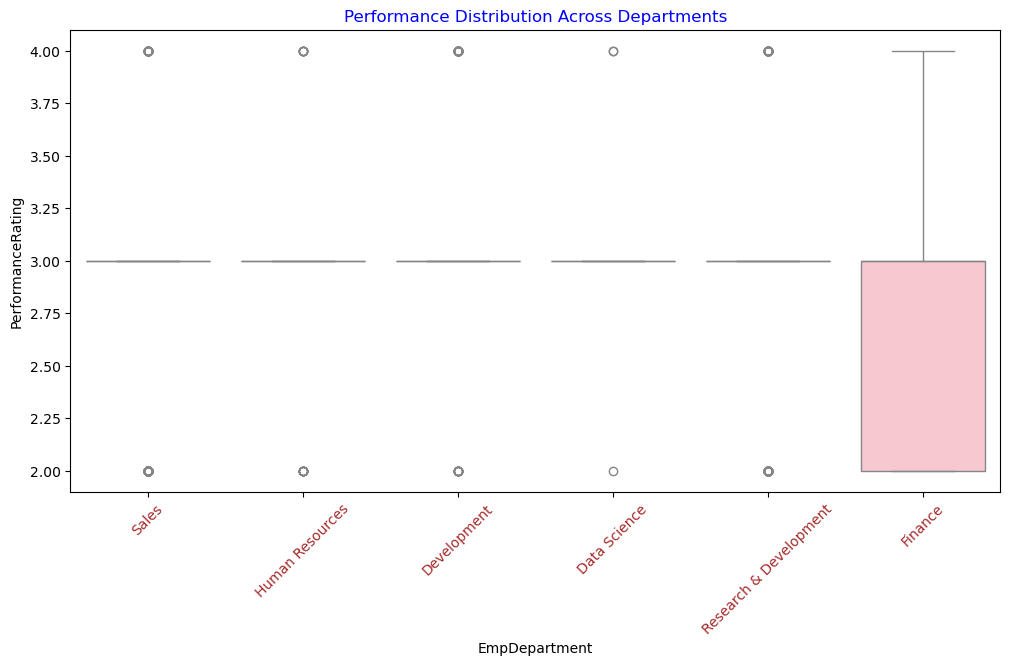

In [13]:
#  Department-wise Performance Analysis using the box plot

plt.figure(figsize=(12, 6))
sns.boxplot(x='EmpDepartment', y='PerformanceRating', data=df, color = 'pink')
plt.xticks(rotation=45, color = 'brown')
plt.title('Performance Distribution Across Departments', color = 'blue')
plt.show()


Across departments, the median performance rating is consistently 3.0, with all groups displaying both high (4.0) and low (2.0) ratings, though these outliers are less common. 

Notably, while most departments exhibit a fairly uniform distribution of ratings, the Finance department shows greater variability, indicating potential areas that might require additional attention. 

Overall, the performance rating system appears standardized, with the majority of employees clustering around the median score. However, the Finance department’s higher rating fluctuations shows that the department it may require further attention to understand and address the performance disparities.

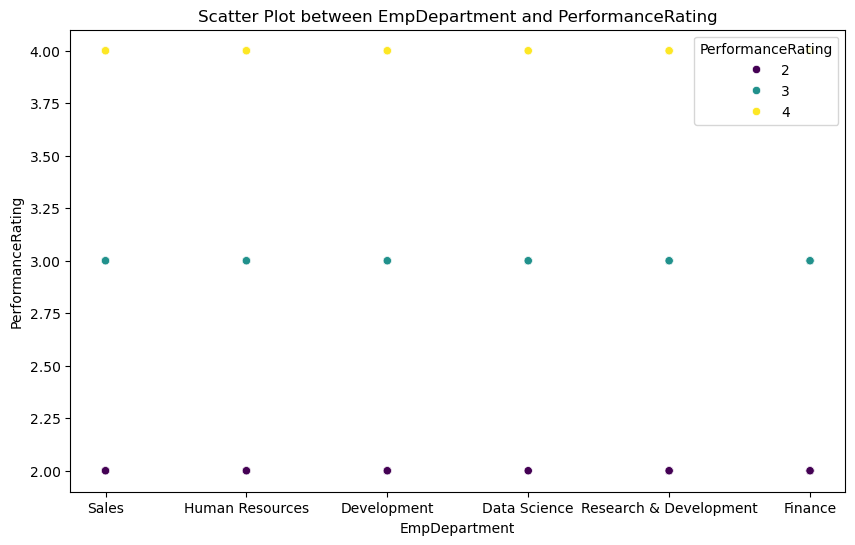

In [14]:
# Scatter Plot for Outlier Analysis
def plot_scatter(df, column1, column2):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[column1], y=df[column2], hue=df[column2], palette='viridis')
    plt.title(f'Scatter Plot between {column1} and {column2}')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.show()

# Example scatter plot between Age and MonthlyIncome
plot_scatter(df, 'EmpDepartment', 'PerformanceRating')

The performance rating distribution across departments shows that department assignment isn't a strong determinant of performance rating, and good performance can be achieved regardless of which department an employee works in.

# Department-wise Performance Analysis and Visualization

## i) Performance Rating Disctribution with Grouped Bar Chart

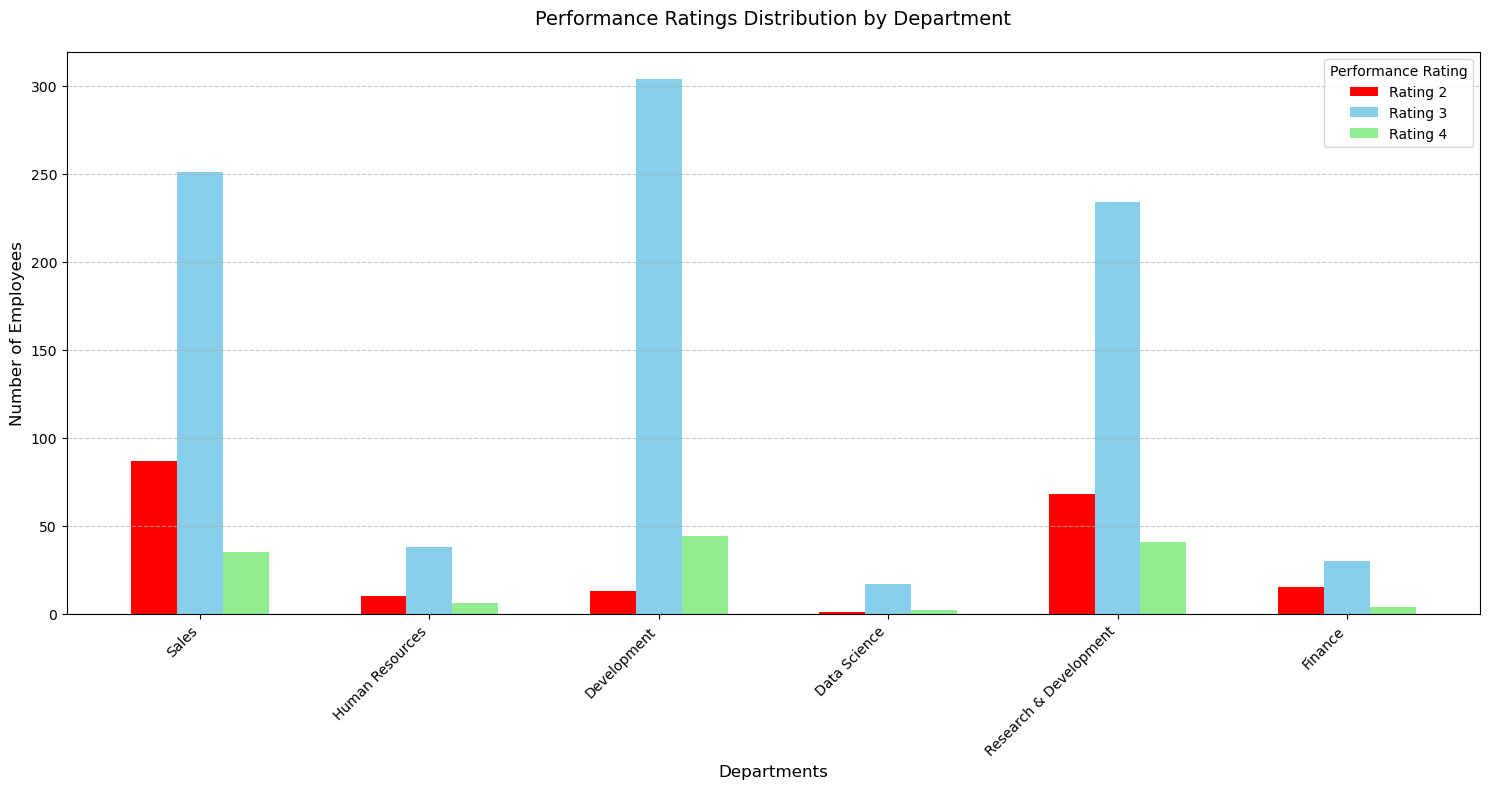

In [15]:
# We shall visualise using the histogram

# Create grouped bar chart
plt.figure(figsize=(15, 8))
departments = df['EmpDepartment'].unique() #Setting unique values for the department
ratings = sorted(df['PerformanceRating'].unique()) #Setting unique values for the performance rates

# Set position of bar on X axis
bar_width = 0.2
positions = np.arange(len(departments))

# Colors for different ratings
colors = ['red', 'skyblue', 'lightgreen'] # Red, Skyblue, Light green

# Plotting separate bars for each rating
for idx, rating in enumerate(ratings):
    counts = [len(df[(df['EmpDepartment'] == dept) & (df['PerformanceRating'] == rating)]) 
             for dept in departments]
    plt.bar(positions + (idx * bar_width), 
            counts, 
            bar_width, 
            label=f'Rating {rating}',
            color=colors[idx])

# Customize the plot
plt.xlabel('Departments', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.title('Performance Ratings Distribution by Department', fontsize=14, pad=20)

# Set x-axis labels
plt.xticks(positions + bar_width * (len(ratings)-1)/2, departments, rotation=45, ha='right')

# Add legend
plt.legend(title='Performance Rating')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()


The grouped bar chart have been plotted showing the distribution of the performance rate per deparment. Separate bars have been represented by different colors for to represent Performance Rate. 

This visual shows that the development department posted the highest number of performance rates under 3.00 and 4.00 but also because it is among tthe departments with the largest number of employees in the dataset. Sales department led in number on the performance rating 2.0. 

 ## ii) Employee Distribution per Department


 Number of Staff per Department:
________________________________________
EmpDepartment
Data Science               20
Development               361
Finance                    49
Human Resources            54
Research & Development    343
Sales                     373
Name: EmpNumber, dtype: int64


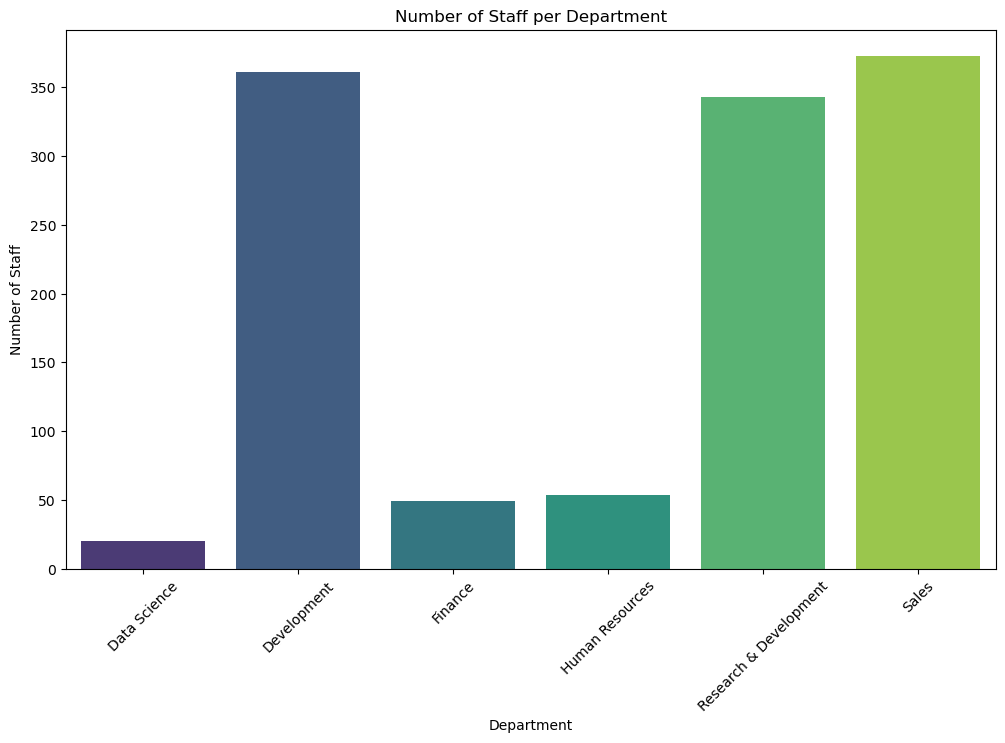

In [16]:
# Calculating the number of employees by department
dept_distribution = df.groupby('EmpDepartment')['EmpNumber'].agg('count').round(2)

print("\n Number of Staff per Department:")
print("__" *20)
print(dept_distribution)

# Bar Chart Visualization for Number of Staff per Department from the pivot table
Staff_summary = {'EmpDepartment': ['Data Science', 'Development', 'Finance', 'Human Resources', 'Research & Development', 'Sales'],
                 'count': [20, 361, 49, 54, 343, 373]}
Staff_df = pd.DataFrame(Staff_summary)

plt.figure(figsize=(12, 7))
sns.barplot(x='EmpDepartment', y='count', data=Staff_df, palette='viridis') # Sets the X and Y variables with the y representing the values of the count key from the Staff_summary dictionary. 
plt.title('Number of Staff per Department')
plt.xlabel('Department')
plt.ylabel('Number of Staff')
plt.xticks(rotation=45)
plt.show()

The distribution of the staff has been represented on a pivot using the groupby function to represent the umber of staff per department. 

The X and Y variables plotted have been derived from the Staff_summary dictionary with values from the 'EmpDepartment' and 'count'.

The sales deparment has the highest number of employees at 373 followed by Development department that has 361. The data science deparment has the least number of staff at 20.

## iii) Further Visuals to visualise the distribution of the performance Ratings

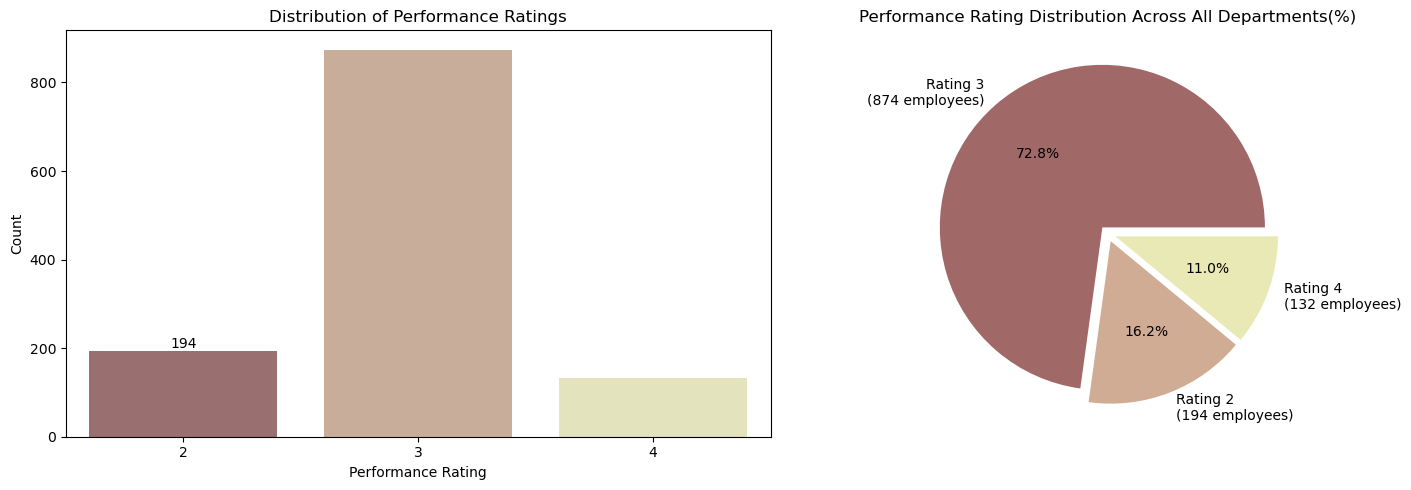


Performance Rating Distribution Summary:
----------------------------------------
PerformanceRating
2    194
3    874
4    132
Name: count, dtype: int64

Percentage Distribution:
----------------------------------------
PerformanceRating
2    16.2
3    72.8
4    11.0
Name: proportion, dtype: float64 %


In [17]:
# Create figure with two subplots
plt.figure(figsize=(15, 5))

# 1. Using the Bar Plot
plt.subplot(1, 2, 1) #The first figure
sns.countplot(data=df, x='PerformanceRating', palette='pink')
plt.title('Distribution of Performance Ratings')
plt.xlabel('Performance Rating')
plt.ylabel('Count')

# Add count labels on top of bars
for i in plt.gca().containers[0]:
    plt.gca().text(i.get_x() + i.get_width()/2, 
                  i.get_height(), 
                  str(int(i.get_height())), 
                  ha='center', va='bottom')

# 2. Using the Pie Chart
plt.subplot(1, 2, 2) #The second figure
rating_counts = df['PerformanceRating'].value_counts()
plt.pie(rating_counts, 
        labels=[f'Rating {r}\n({c} employees)' for r, c in rating_counts.items()],
        autopct='%1.1f%%',
        colors=sns.color_palette('pink', n_colors=len(rating_counts)),
        explode=[0.05] * len(rating_counts))
plt.title('Performance Rating Distribution Across All Departments(%)')

plt.tight_layout()
plt.show()


# Print summary statistics
print("\nPerformance Rating Distribution Summary:")
print("-" * 40)
print(df['PerformanceRating'].value_counts().sort_index())
print("\nPercentage Distribution:")
print("-" * 40)
print(df['PerformanceRating'].value_counts(normalize=True).sort_index().multiply(100).round(1), "%")

The performance ratings show a significant imbalance with Rating 3 dominating at 72.8% (874 employees), while Rating 2 (16.2%, 194 employees) and Rating 4 (11%, 132 employees) represent much smaller portions of the workforce. 

This distribution is highly skewed towards the middle rating suggesting that either a standardized performance evaluation system was used that favors average ratings, or could indicate a possible bias in the performance assessment process where evaluators may be hesitant to give extreme ratings.

## iv) Pivot Tables for Distribution of the Performance Ratings

In [18]:
# Create pivot table
performance_pivot = pd.pivot_table(df, 
                                 values='EmpNumber',  # Count employees
                                 index='EmpDepartment',
                                 columns='PerformanceRating',
                                 aggfunc='count',
                                 fill_value=0)

# Add a total column
performance_pivot['Total Employees'] = performance_pivot.sum(axis=1)

# Add a total row
performance_pivot.loc['Total'] = performance_pivot.sum()


# Format and visualize the table
print("\nDepartment-wise Performance Rating Summary:")
print("-" * 55)
performance_pivot


Department-wise Performance Rating Summary:
-------------------------------------------------------


PerformanceRating,2,3,4,Total Employees
EmpDepartment,,,,
Data Science,1,17,2,20
Development,13,304,44,361
Finance,15,30,4,49
Human Resources,10,38,6,54
Research & Development,68,234,41,343
Sales,87,251,35,373
Total,194,874,132,1200


Converts the Values for the EmpNumber, EmpDepartment and Performance rating using ithe 'count' aggregate function and also inputs the Total row and Total Employees column on the pivot

In [19]:
# Number of employees formatted as percentages within each department

print("\nPercentage Distribution within Departments:")
print("-" * 70)
percentage_pivot = performance_pivot.div(performance_pivot['Total Employees'], axis=0) * 100
percentage_pivot


Percentage Distribution within Departments:
----------------------------------------------------------------------


PerformanceRating,2,3,4,Total Employees
EmpDepartment,,,,
Data Science,5.000000,85.000000,10.000000,100.0
Development,3.601108,84.210526,12.188366,100.0
Finance,30.612245,61.224490,8.163265,100.0
Human Resources,18.518519,70.370370,11.111111,100.0
Research & Development,19.825073,68.221574,11.953353,100.0
Sales,23.324397,67.292225,9.383378,100.0
Total,16.166667,72.833333,11.000000,100.0


Shows a pivot for the number of employees formatted as percentages within each department

# 2. Feature Engineering

## 1. Label Encoding

We shall proceed to encode all the categorical features and assign the data to the new data frame df_encoded for processing

In [20]:
# First encode all categorical columns
categorical_cols = ['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 
                   'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']

#Instantiate the LabelEncoder
le = LabelEncoder()

# Create a copy of the dataframe
df_encoded = df.copy()

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df[col])


We'll proceed to encode the categorical variables using the label encoder and create a copy of the dataframe and map it to the encoded data as df_encoded which we'll be using accross the notebook for various processess.

In [21]:
#Viewing the encoded data to check completion of encoding
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   EmpNumber                     1200 non-null   int32
 1   Age                           1200 non-null   int64
 2   Gender                        1200 non-null   int32
 3   EducationBackground           1200 non-null   int32
 4   MaritalStatus                 1200 non-null   int32
 5   EmpDepartment                 1200 non-null   int32
 6   EmpJobRole                    1200 non-null   int32
 7   BusinessTravelFrequency       1200 non-null   int32
 8   DistanceFromHome              1200 non-null   int64
 9   EmpEducationLevel             1200 non-null   int64
 10  EmpEnvironmentSatisfaction    1200 non-null   int64
 11  EmpHourlyRate                 1200 non-null   int64
 12  EmpJobInvolvement             1200 non-null   int64
 13  EmpJobLevel                   120

Viewing the encoded dataframe for the new encoded feature characteristics

## 2. The Correlation Matrix

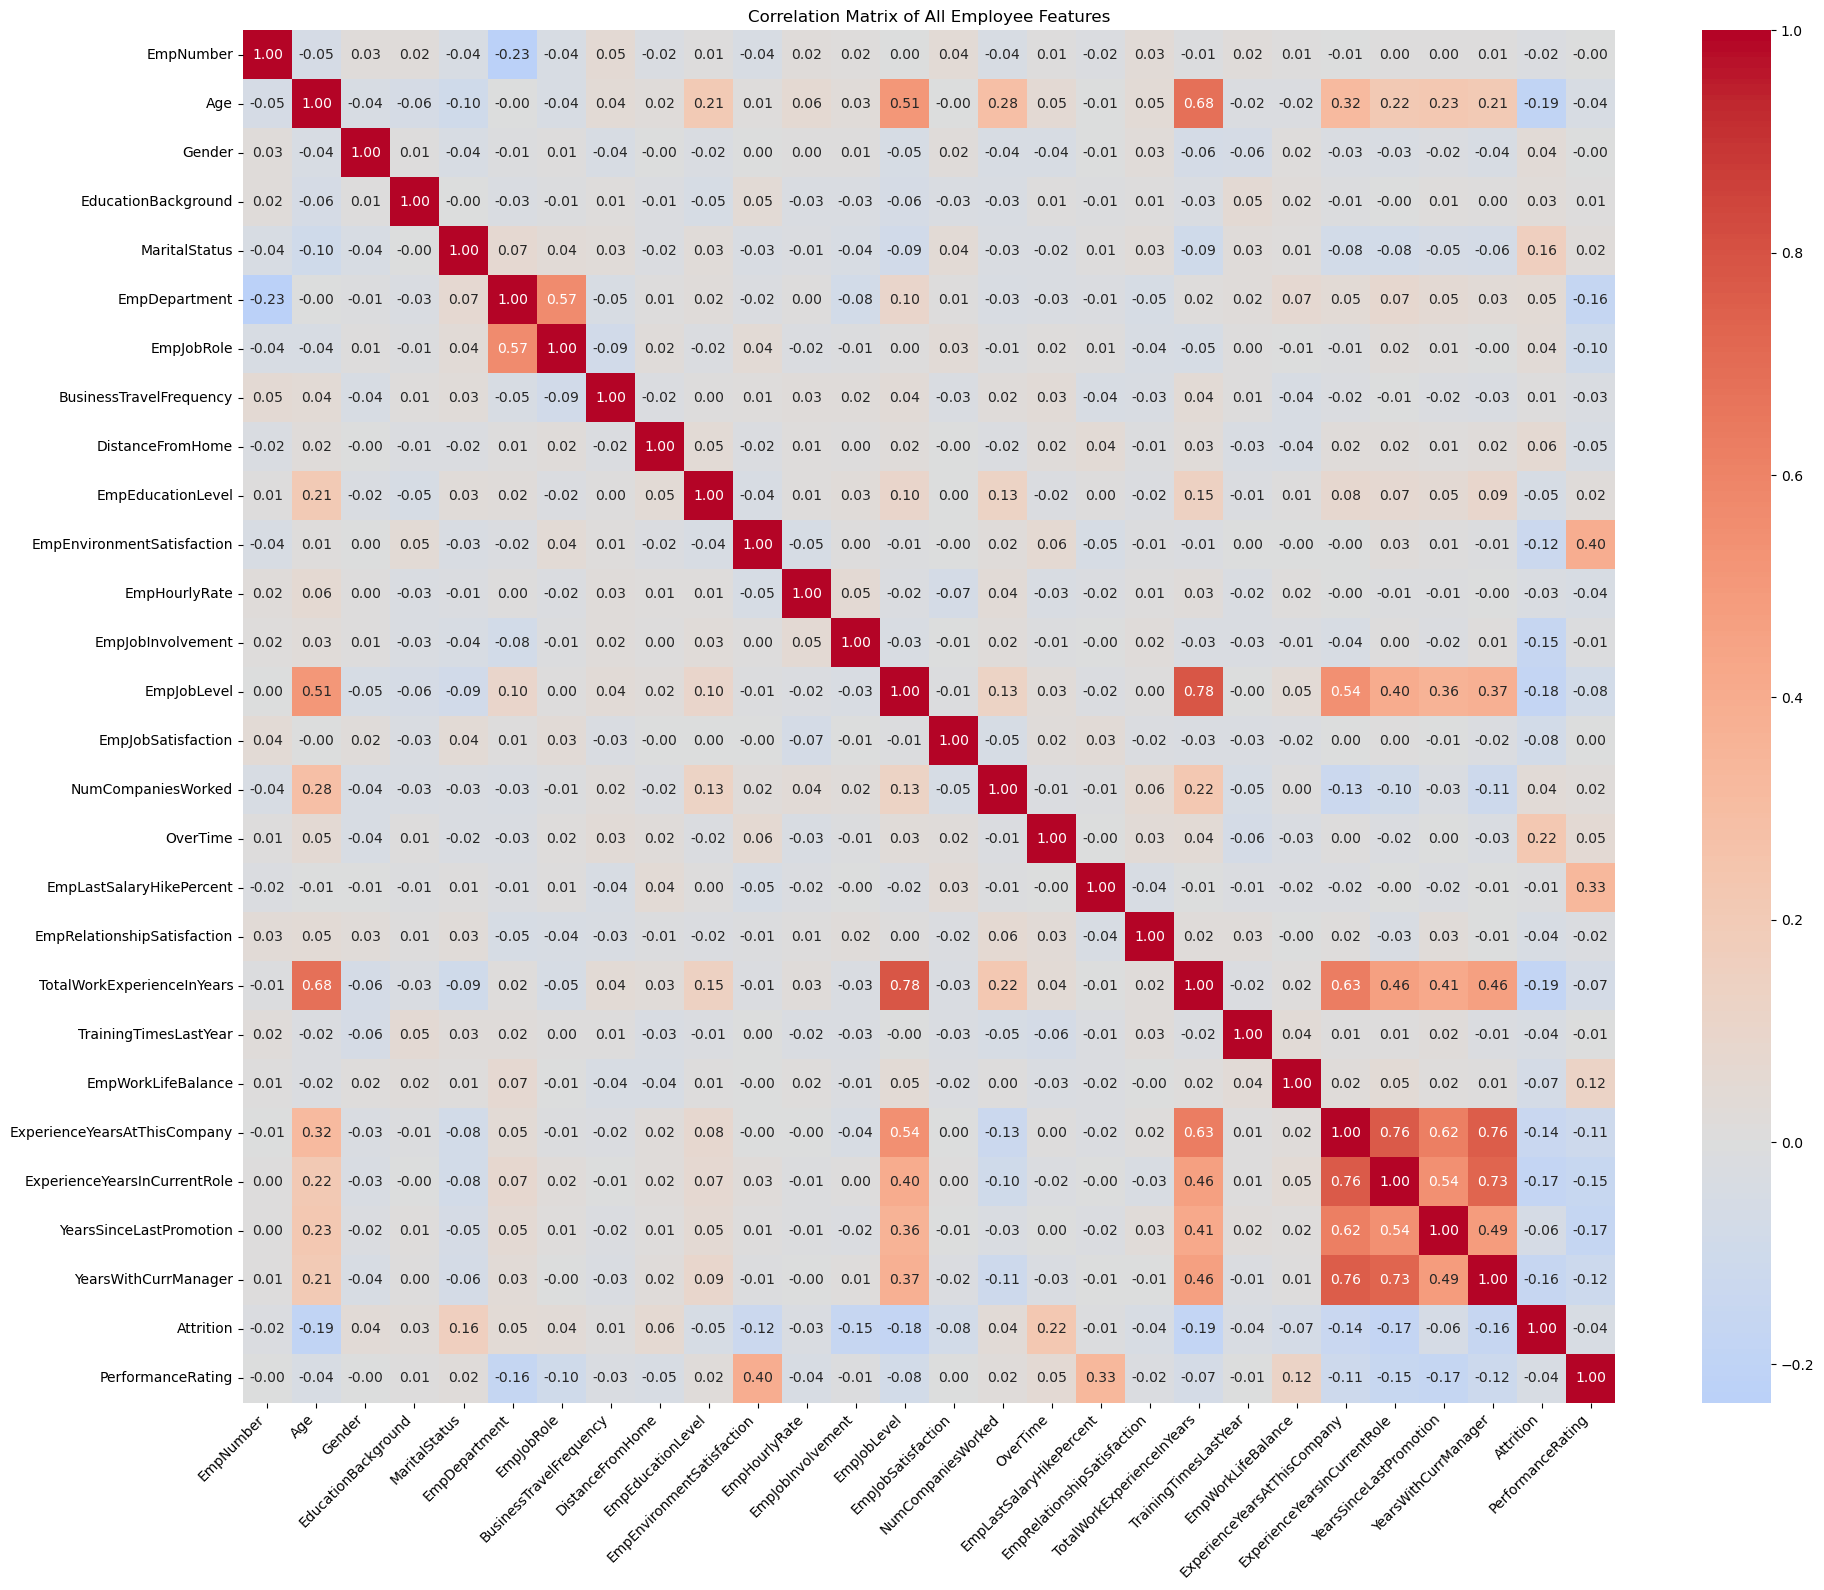

In [22]:
#Analysis to evaluate the correlation between features and variables:

# Create correlation matrix for all the features of the dataset
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(20, 16))  # Increased size for better readability
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Round to 2 decimal places
            square=True)  # Make cells square

plt.title('Correlation Matrix of All Employee Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The correlation matrix above shows several significant relationships between employee features and performance ratings, with the most influential features showing moderate correlations. 

Experience-related metrics have strong positive correlations with each other, particularly among YearsWithCurrManager, ExperienceYearsAtThisCompany, and TotalWorkExperienceInYears (correlations ranging from 0.6 to 0.8). 

The performance rating still shows notable correlations with EmpEnvironmentSatisfaction, YearsSinceLastPromotion, and EmpLastSalaryHikePercent, suggesting these are indeed important predictive features as identified in our model.

Interestingly, demographic factors like Age and Gender show weaker correlations with performance, while job-related factors such as EmpJobLevel and EmpHourlyRate show moderate positive correlations with experience metrics but not directly with performance ratings, indicating that career progression and compensation don't necessarily translate to higher performance evaluations.


## The Top 5 strongest Correlations

In [23]:

# To display the top 10 strongest correlations from the dataset

print("\nTop 10 Strongest Correlations:")
# Get upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# Stack the correlations and sort by absolute value
strongest_correlations = upper.unstack()
strongest_correlations = strongest_correlations[strongest_correlations != 0].sort_values(key=abs, ascending=False)
print("__" *40)
strongest_correlations.head(10)


Top 10 Strongest Correlations:
________________________________________________________________________________


TotalWorkExperienceInYears    EmpJobLevel                     0.784229
ExperienceYearsInCurrentRole  ExperienceYearsAtThisCompany    0.764102
YearsWithCurrManager          ExperienceYearsAtThisCompany    0.759258
                              ExperienceYearsInCurrentRole    0.728973
TotalWorkExperienceInYears    Age                             0.680886
ExperienceYearsAtThisCompany  TotalWorkExperienceInYears      0.633555
YearsSinceLastPromotion       ExperienceYearsAtThisCompany    0.620230
EmpJobRole                    EmpDepartment                   0.568973
YearsSinceLastPromotion       ExperienceYearsInCurrentRole    0.540600
ExperienceYearsAtThisCompany  EmpJobLevel                     0.540377
dtype: float64

We'll proceed to get the important features using random forest tree based model which will give us the built-in feature importance.

## 3. Feature Importance

In [24]:
#We shall split our encoded data into features and target variables. 

Features = df_encoded.drop('PerformanceRating', axis =1 )
Target = df['PerformanceRating'] #Target variable

Features.shape, Target.shape #Gets us the shapes of the target and feature variables

((1200, 27), (1200,))

The data is split into target and feature variables and labeled as above. The features shall contain data from the encoded dataframe to allow fitting our model

In [25]:
# Get feature importance using the random forest classification model

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(Features,Target)
feature_importance = pd.DataFrame({
    'Feature': Features.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 15 Important Factors:")
print(feature_importance)



Top 15 Important Factors:
                         Feature  Importance
10    EmpEnvironmentSatisfaction    0.215963
17      EmpLastSalaryHikePercent    0.210612
24       YearsSinceLastPromotion    0.091408
0                      EmpNumber    0.055499
5                  EmpDepartment    0.037315
23  ExperienceYearsInCurrentRole    0.034389
11                 EmpHourlyRate    0.033654
6                     EmpJobRole    0.033612
22  ExperienceYearsAtThisCompany    0.030361
1                            Age    0.028494
21            EmpWorkLifeBalance    0.024224
8               DistanceFromHome    0.022955
25          YearsWithCurrManager    0.022656
19    TotalWorkExperienceInYears    0.021320
15            NumCompaniesWorked    0.017789
20         TrainingTimesLastYear    0.016082
14            EmpJobSatisfaction    0.013651
9              EmpEducationLevel    0.013058
3            EducationBackground    0.012821
18   EmpRelationshipSatisfaction    0.011419
12             EmpJobInvolve

The important features using the random forest model and the built in feature_importance function giving us the important features as we order them in the descending order.

# The Top 3 most Important features

In [26]:
## Display the three most important features

print("\nTop 15 Important Factors:")
print(feature_importance.head(3))


Top 15 Important Factors:
                       Feature  Importance
10  EmpEnvironmentSatisfaction    0.215963
17    EmpLastSalaryHikePercent    0.210612
24     YearsSinceLastPromotion    0.091408


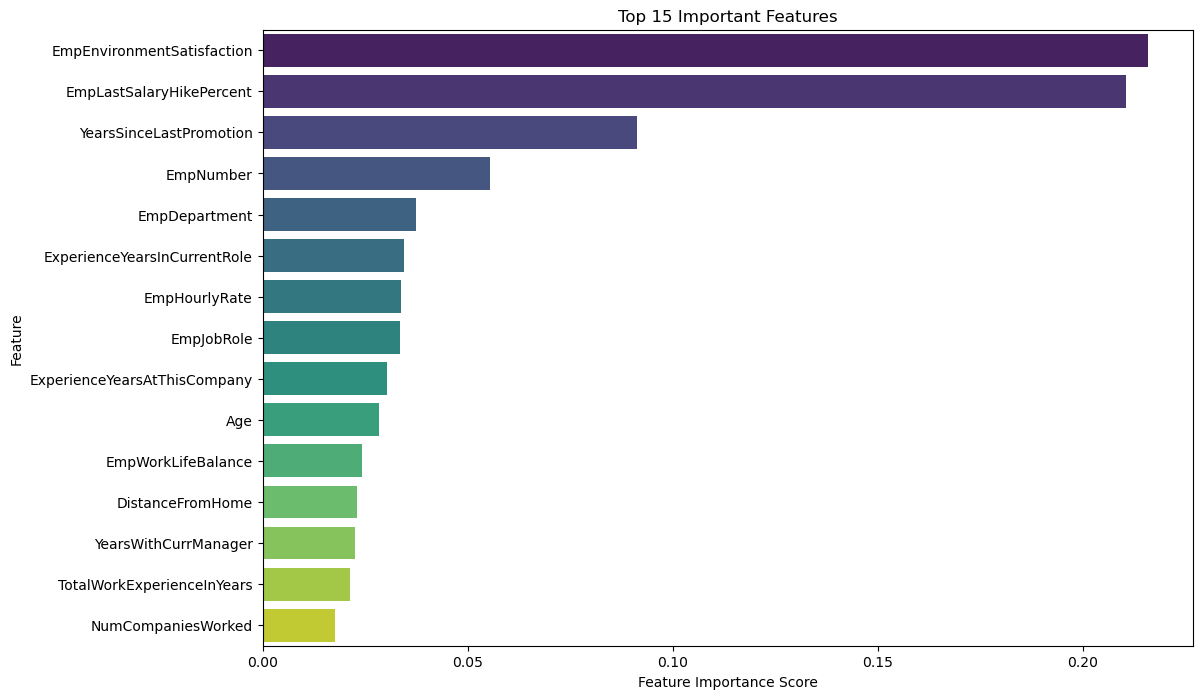

In [27]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': Features.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

# Visualization of the features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Top 15 Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()

The feature importance values are mapped on a dictionary with 'Features' and 'Importance' as keys and a bar plot is fitted onto the values in descending order. Seaborn automatically fits an inverted histogram as it will optimise the visual.

Both from the tuned and un tuned random forest classification models, the top three most important parameters are 
1. EmpLastSalaryHikePercent = 21% explains 21 % of the performance behaviour
2. EmpEnvironmentSatisfaction  = 22%
3. YearsSinceLastPromotion = 10%

The results suggests that recent salary increases and workplace environment strongly contribute to, and significantly impact performance with both over 50% influence.

The third factor is the number of years and employee has stayed since they were last promoted following with an impact of 10%.

# 3. Train a Prediction Model

## Training 5 Prediction Models and choose the best fit

In [28]:
X = df_encoded[['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent','YearsSinceLastPromotion','EmpDepartment','ExperienceYearsInCurrentRole',
                'EmpHourlyRate','EmpJobRole','ExperienceYearsAtThisCompany','Age','EmpWorkLifeBalance','YearsWithCurrManager',
                'TotalWorkExperienceInYears','DistanceFromHome', 'EducationBackground', 'EmpEducationLevel']]
y = df['PerformanceRating'] #Target variable

X.shape , y.shape #Getting the shape of the target and feature variables

((1200, 15), (1200,))

Data is split into two sets, the training and tests sets using the 15 most relevant features influencing the performance rate of staff.

The top 3 features which explain over 50% of the performance behaviour must be available to fit the model i.e 'EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent','YearsSinceLastPromotion'.

In [30]:
# Train Prediction Model by determining the train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Displaying the shape of our train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((960, 15), (240, 15), (960,), (240,))

Data is further split into train and test sets on an 80:20 ratio using the train_test_split function.

20% of the data will be set aside and utilised in model testing.

## Hyper Parameter Tuning and Fitting

Hyperparameter tuning is done using the GridSearchCV cross validation techniques to determine the best parameters for the best fit model for the Random Forest, decision tree and KNN models. 

The nodel is fit directly for the Gradient boosting and LightGBM models as tuning might affect the model performance.

## Model 1: Random Forest Classification Model

In [31]:
##Random Forest classification Model and Hyperparameter tuning

rf = RandomForestClassifier(random_state=42) #Instantiate the model
rf_param_grid = {'n_estimators': [50, 100, 200, 400], 'max_depth': [3, 5, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]} #Define the hyper parameter grid
grid_search_rf = GridSearchCV(rf, rf_param_grid, cv=3, scoring='accuracy', verbose=1)

grid_search_rf.fit(X_train, y_train)
rfc_model = grid_search_rf.best_estimator_
y_pred_rf = rfc_model.predict(X_test)

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Random Forest Classification Report
              precision    recall  f1-score   support

           2       0.96      0.90      0.93        29
           3       0.95      0.99      0.97       184
           4       0.95      0.74      0.83        27

    accuracy                           0.95       240
   macro avg       0.95      0.88      0.91       240
weighted avg       0.95      0.95      0.95       240



In [131]:
rfc_model

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

After tuning the parameters, the following parameters make the best fit for the random forest model: max_depth=10, min_samples_split=5, n_estimators=200, random_state=42 giving a better accuracy of 95%.

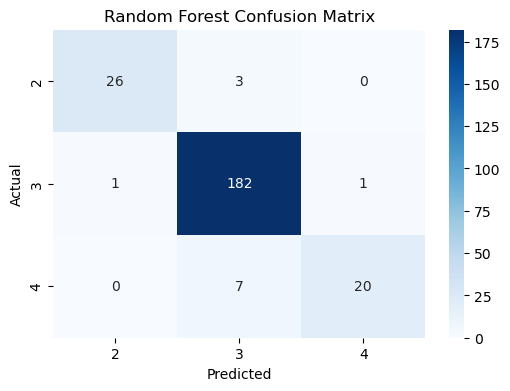

In [33]:
# Funtion for Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred, title): 
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest Confusion Matrix')

## Overall Model Performance:
1. Accuracy: 95% (228 out of 240 total predictions correct)


No extreme misclassifications (between 2 and 4)

Strong performance across all classes, with slight weakness in detecting high performers (Class 4)

3. Classification Report

precision for class 3 - 95% correctly predicted

Recall for class 3 - 99% correctly predicted

## Model 2: Decision Tree Classification Model

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Decision Tree Classification Report
              precision    recall  f1-score   support

           2       0.96      0.90      0.93        29
           3       0.95      0.97      0.96       184
           4       0.80      0.74      0.77        27

    accuracy                           0.93       240
   macro avg       0.90      0.87      0.88       240
weighted avg       0.93      0.93      0.93       240



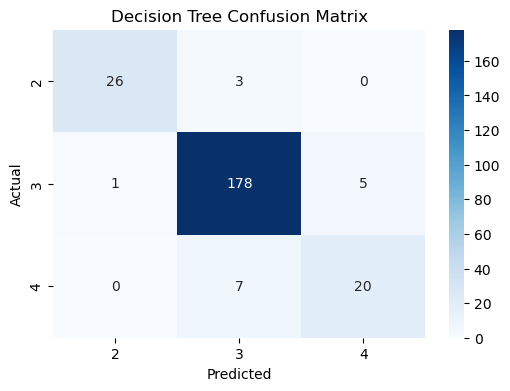

In [34]:
## Decision Tree Classification Model and Hyperparameter Tuning

dt = DecisionTreeClassifier(random_state=42) # Instantiate the model

dt_param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]} #Difine the hyper parameter grid
grid_search_dt = GridSearchCV(dt, dt_param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))

plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree Confusion Matrix')

A decision tree model is fit on the training set after tuning for the best parameters

The model performs best on Class 3 (majority class)

High precision but lower recall for Classes 2 and 4 (minority classes)

Total of 240 samples were tested (29 + 184 + 27)

Model shows good overall performance with 93% accuracy score

## Overall Model Performance:
1. Accuracy: 93% (224 out of 240 total predictions were correct)

The model performs exceptionally well on the majority class (Rating 3) 

2. Classification Report

precision for class 3 - 95% correctly predicted

Recall for class 3 - 97% correctly predicted

## Model 3: Gradient Boosting Model

Gradient Boosting Classification Report
              precision    recall  f1-score   support

           2       0.96      0.86      0.91        29
           3       0.94      0.98      0.96       184
           4       0.87      0.74      0.80        27

    accuracy                           0.94       240
   macro avg       0.92      0.86      0.89       240
weighted avg       0.94      0.94      0.94       240



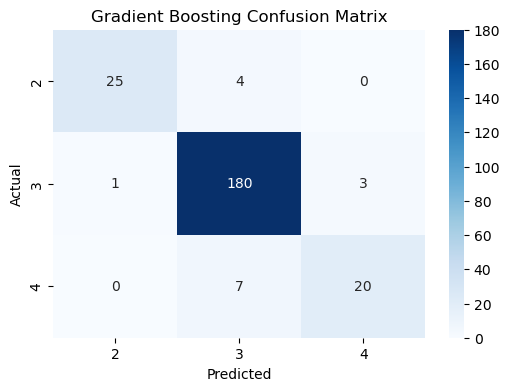

In [37]:
# We will tune the grandiant boosting model without tuning parameters as tuning may affect the model performance

# Gradient Boosting Model
gb = GradientBoostingClassifier(random_state=42) # Instantiate the model

gb.fit(X_train, y_train) #Fit the train sets
y_pred_gb = gb.predict(X_test) #Make predictions on the test set

print("Gradient Boosting Classification Report") #Display the results
print(classification_report(y_test, y_pred_gb))

plot_confusion_matrix(y_test, y_pred_gb, 'Gradient Boosting Confusion Matrix')

## Overall Model Performance

A Gradient boosting model is fit on the training set without tuning for the best parameters as this may afferct the overall performance to the model

The model performs best on Class 3 (majority class)

High precision but lower recall for Classes 2 and 4 (minority classes)
Good precision and recall for class 3 (94%, 98%)

Total of 240 samples were tested (29+184+27), 225 predicted correctly

Model shows good overall performance with 94% accuracy score

## Model 4: K-Nearest Neighbors (KNN) Model

Fitting 3 folds for each of 16 candidates, totalling 48 fits
KNN Classification Report
              precision    recall  f1-score   support

           2       0.11      0.03      0.05        29
           3       0.77      0.95      0.85       184
           4       0.33      0.04      0.07        27

    accuracy                           0.74       240
   macro avg       0.40      0.34      0.32       240
weighted avg       0.64      0.74      0.67       240



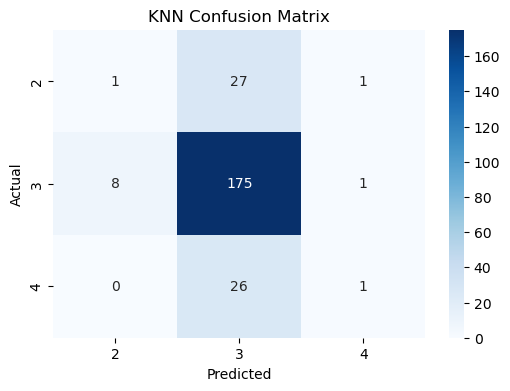

In [36]:
## KNN Hyperparameter Tuning

knn = KNeighborsClassifier() #Instabtiate the model
knn_param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid_search_knn = GridSearchCV(knn, knn_param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

print("KNN Classification Report")
print(classification_report(y_test, y_pred_knn))

plot_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

## Overall Model Performance:
1. Accuracy: 74% (177 out of 240 total predictions were correct)

The model performs poorly on almost all classes giving an overall poor performance

3. Classification Report
precision for class 3 - 77% correctly predicted

Recall for class 3 - 95% correctly predicted

## Model 5: LightGBM Classification model

LightGBM Classification Report
              precision    recall  f1-score   support

           2       0.96      0.90      0.93        29
           3       0.95      0.99      0.97       184
           4       1.00      0.74      0.85        27

    accuracy                           0.95       240
   macro avg       0.97      0.88      0.92       240
weighted avg       0.96      0.95      0.95       240



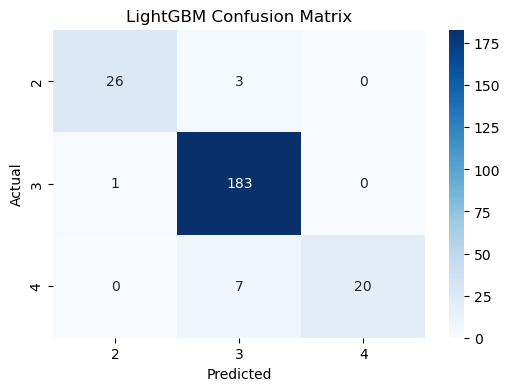

In [40]:
#Instantiate the lightGBM classifier
lclf = lgb.LGBMClassifier(n_estimators=100, verbosity=-1)
lclf.fit(X_train, y_train)

#predict on the training set
y_pred_lgb = lclf.predict(X_test)

print("LightGBM Classification Report")
print(classification_report(y_test, y_pred_lgb))

plot_confusion_matrix(y_test, y_pred_lgb, 'LightGBM Confusion Matrix')

This model was also fit directly without tuning hyperparameters, n_estimators set to 100 and verbosity = -1 to mute out any light warnings.

## Overall Model Performance: Good

1. Accuracy: 95% (229 out of 240 total predictions were correct)

The model performs exceptionally well across all parameters as well as the Random forest.

2. Classification Report:

Precision for class 3 - 95% correctly predicted

Recall for class 3 - 99% correctly predicted

## Model Selection

The first three models have performed fairly well across all the classes with a total of correctly predicted values for the models as follows

Random forest model = 228 correct predictions, Accuracy score 95%

Decision tree model = 224 correct predictions, Accuracy score 93%

Gradient Boosting Model = 225 correct predictions, Accuracy score 94%

KNN K-nearest Neighbors = as the least with 177 correct predictions, Accuracy score 74%

LightGBM Model = 229 as the highest number correct predictions, Accuracy score 95%

Random Forest model and Gradient boosting Model having slightly the same Accuracy and exceptional perdormane both tying at 95% accuracy score, the random forest would still stand as a great choice due to the following perks that outweigh the other model:

1. It's robust and will give more stable predictions as it is an ensemble method combining multiple decision trees hence less prone to overfitting
2. Provides better feature importance insights helping us understand which employee characteristics most influence performance ratings hence helping HR in decision-making and policy formation
                
                                                                                                                                           

## Cross-validation Scores for Selecting the Robust Model

Cross-validation will help prevent overfitting for our selected model as it will ensure that we choose the model performs well on unseen data.

It therefore provides a better measure of how the model will perform in real-world scenarios.

## Evaluating the cross validation scores


This built in function automatically sets the number of splits to a default 5 fold. 

cross_val_score(model, X, y)

In [41]:
print(f'The Deecision Tree Model performance CV score is:')
print(cross_val_score(best_dt, X, y))

print(f'\nThe Random Forest Classification Model performance CV score is:')
print(cross_val_score(rfc_model, X, y))

print(f'\nThe Gradient Boost Model performance CV score is:')
print(cross_val_score(gb, X, y))

print(f'\nThe K-Nearest Neighbors(KNN) Model performance CV score is:')
print(cross_val_score(best_knn, X, y))

print(f'\nThe LGBMClassification Model performance CV score is:')
print(cross_val_score(lclf, X, y))


The Deecision Tree Model performance CV score is:
[0.9125     0.92916667 0.95416667 0.9        0.875     ]

The Random Forest Classification Model performance CV score is:
[0.90833333 0.95833333 0.9875     0.9125     0.9       ]

The Gradient Boost Model performance CV score is:
[0.9125     0.93333333 0.9875     0.925      0.9       ]

The K-Nearest Neighbors(KNN) Model performance CV score is:
[0.69583333 0.71666667 0.72916667 0.725      0.70416667]

The LGBMClassification Model performance CV score is:
[0.9125     0.92916667 0.97083333 0.91666667 0.90416667]


The Random Classification Model stands out with the best and consisted performance from the other 4, meaning that it will perform well on new data to the model.
This makes it a more reliable, robust and stable model.

## We shall therefore proceed and build our prediction model app based on the Random Forest Classification Model

In [42]:
import pickle
# Save the Random Forest classificassion model in a web binary machine readable format
pickle.dump(rfc_model, open('Staff Performance Analysis.pkl', 'wb'))

This line instantly creates a pickle file named Staff Performance Analysis upon execution.

## The End __ 

Now onto Model Deployment using Streamlit

References/Pipelines: 

SciKit Learn Machine learning Documentation. link:https://scikit-learn.org/stable/

Streamlit Documentation: link:https://docs.streamlit.io/
